In [2]:
from pprint import pformat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from KNNAnalytics import KNN
np.seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [3]:
# Load data:

data = pd.read_csv("bodyfat.csv")
print(data.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [4]:
# Preprocessing:

predict = 'BodyFat'

Y = data[predict]
X = data.drop(columns=[predict])
Xlabels = X.columns

Y = Y.transform(lambda x: 1 if x <= 5 else (2 if x>5 and x<=14 else (3 if x>14 and x<16 else(4 if x>=16 and x<25 else 5))))

print(f'Target Class:\n{Y.head()}')
print(f'Feature Class:\n{X.head()}')

Y = Y.to_numpy()
X = X.to_numpy()

Target Class:
0    2
1    2
2    5
3    2
4    5
Name: BodyFat, dtype: int64
Feature Class:
   Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1   1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2   1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3   1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4   1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  


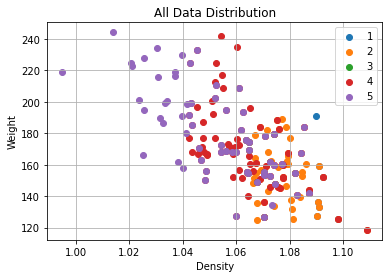

In [5]:
# Distrubuition of data: 

Xd = X.copy()
Yd = Y.copy()

TargetLabels = list(set(Y))

for i in range(len(Yd)):
    for j in range(i + 1, len(Yd)):
        if Yd[i] > Yd[j]:
            Yd[i], Yd[j] = Yd[j], Yd[i]
            Xd[i], Xd[j] = Xd[j], Xd[i]

lens = [0]
setY_ = list(set(Yd))
soma = 0
for i in range(len(setY_)):
    for j in range(len(Yd)):
        if Yd[j] == setY_[i]:
            soma += 1
    lens.append(soma)

plt.figure()
for i in range(len(setY_)):
    plt.scatter(Xd[lens[i]:lens[i+1]-1, 0], Xd[lens[i]:lens[i+1]-1, 2])
plt.legend(TargetLabels)
plt.ylabel(Xlabels[2])
plt.title("All Data Distribution")
plt.xlabel(Xlabels[0])
plt.grid()

O melhor testsize é: 0.1



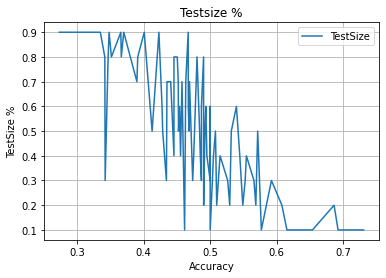

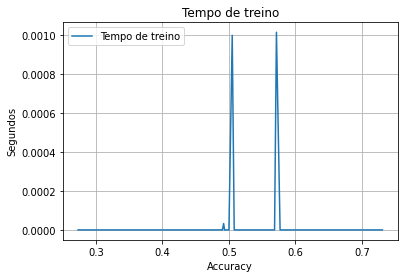

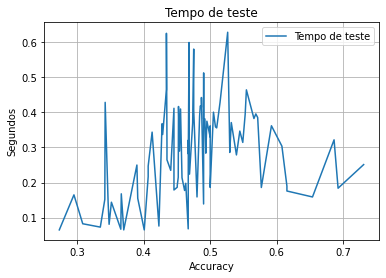

In [6]:
# Find the best split train/test for the data

accTestsize = []
modelosTestsize = []

for i in range(10):
    for t in np.arange(0.1, 1, 0.1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t)
        clf = KNN()

        tempoTreino = time.time()
        clf.fit(X_train, Y_train, Xlabels)
        tempoTreino = time.time() - tempoTreino

        tempoTeste = time.time()
        pred, p = clf.predict(X_test)
        tempoTeste = time.time() - tempoTeste

        acc = clf.getAccuracy(pred, Y_test)

        modelosTestsize.append([clf, t, acc, tempoTreino, tempoTeste])
        accTestsize.append(acc)

for i in range(len(accTestsize)):
    for j in range(i + 1, len(accTestsize)):
        if accTestsize[i] > accTestsize[j]:
            modelosTestsize[i], modelosTestsize[j] = modelosTestsize[j], modelosTestsize[i]
            accTestsize[i], accTestsize[j] = accTestsize[j], accTestsize[i]

bestTestsize = modelosTestsize[-1]
testsize = bestTestsize[1]

print(f'O melhor testsize é: {testsize}\n')

modelosTestsize = np.array(modelosTestsize)

plt.figure()
plt.title('Testsize %')
plt.plot(modelosTestsize[:, 2], modelosTestsize[:, 1], label="TestSize")
plt.ylabel("TestSize %")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('Tempo de treino')
plt.plot(modelosTestsize[:, 2], modelosTestsize[:, 3], label="Tempo de treino")
plt.ylabel("Segundos")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('Tempo de teste')
plt.plot(modelosTestsize[:, 2], modelosTestsize[:, 4], label="Tempo de teste")
plt.ylabel("Segundos")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

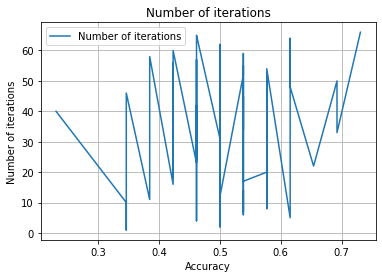

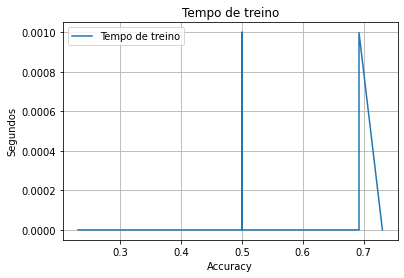

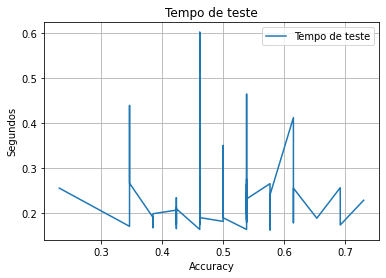

In [7]:
# Getting the best split of data for prediction with testsize = 0.1:

accTestsize = []
modelosTestsize = []

t = 0
while 1:
    t += 1

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=testsize)
    clf = KNN()

    tempoTreino = time.time()
    clf.fit(X_train, Y_train, Xlabels)
    tempoTreino = time.time() - tempoTreino

    tempoTeste = time.time()
    pred, p = clf.predict(X_test)
    tempoTeste = time.time() - tempoTeste

    acc = clf.getAccuracy(pred, Y_test)

    modelosTestsize.append([clf, t, acc, tempoTreino, tempoTeste])
    accTestsize.append(acc)

    if acc >= 0.7:
        break

for i in range(len(accTestsize)):
    for j in range(i + 1, len(accTestsize)):
        if accTestsize[i] > accTestsize[j]:
            modelosTestsize[i], modelosTestsize[j] = modelosTestsize[j], modelosTestsize[i]
            accTestsize[i], accTestsize[j] = accTestsize[j], accTestsize[i]

bestTestsize = modelosTestsize[-1]
testsize = bestTestsize[1]

modelosTestsize = np.array(modelosTestsize)

plt.figure()
plt.title('Number of iterations')
plt.plot(modelosTestsize[:, 2], modelosTestsize[:, 1], label="Number of iterations")
plt.ylabel("Number of iterations")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('Tempo de treino')
plt.plot(modelosTestsize[:, 2], modelosTestsize[:, 3], label="Tempo de treino")
plt.ylabel("Segundos")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('Tempo de teste')
plt.plot(modelosTestsize[:, 2], modelosTestsize[:, 4], label="Tempo de teste")
plt.ylabel("Segundos")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

O melhor kn é: 15
O melhor r é: 2


Text(0.5, 0, 'Accuracy')

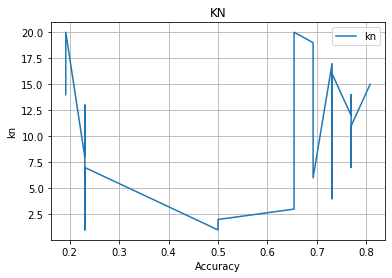

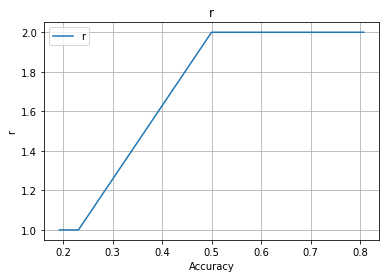

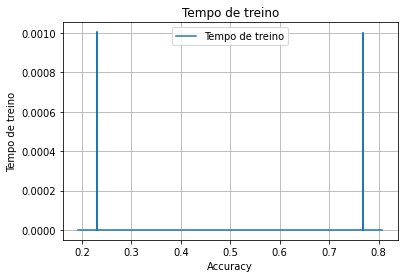

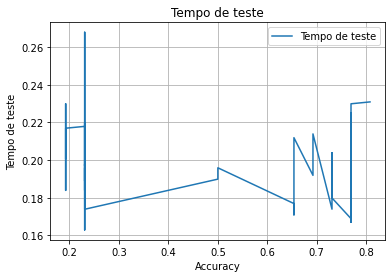

In [8]:
# Find the best paramns kn and r for the data:

accParamns = []
modelosParamns = []

for r in range(1, 3):
    for k in range(1, 21):
        clf = KNN(kn=k, r=r)

        tempoTreino = time.time()
        clf.fit(X_train, Y_train, Xlabels)
        tempoTreino = time.time() - tempoTreino

        tempoTeste = time.time()
        pred, p = clf.predict(X_test)
        tempoTeste = time.time() - tempoTeste

        acc = clf.getAccuracy(pred, Y_test)

        modelosParamns.append([clf, k, r, acc, tempoTreino, tempoTeste])
        accParamns.append(acc)

for i in range(len(accParamns)):
    for j in range(i + 1, len(accParamns)):
        if accParamns[i] > accParamns[j]:
            modelosParamns[i], modelosParamns[j] = modelosParamns[j], modelosParamns[i]
            accParamns[i], accParamns[j] = accParamns[j], accParamns[i]

bestParamns = modelosParamns[-1]
kn = bestParamns[1]
r = bestParamns[2]

print(f'O melhor kn é: {kn}')
print(f'O melhor r é: {r}')

modelosParamns = np.array(modelosParamns)

plt.figure()
plt.title('KN')
plt.plot(modelosParamns[:, 3], modelosParamns[:, 1], label="kn")
plt.ylabel("kn")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('r')
plt.plot(modelosParamns[:, 3], modelosParamns[:, 2], label="r")
plt.ylabel("r")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('Tempo de treino')
plt.plot(modelosParamns[:, 3], modelosParamns[:, 4], label="Tempo de treino")
plt.ylabel("Tempo de treino")
plt.xlabel("Accuracy")
plt.legend()
plt.grid()

plt.figure()
plt.title('Tempo de teste')
plt.plot(modelosParamns[:, 3], modelosParamns[:, 5], label="Tempo de teste")
plt.ylabel("Tempo de teste")
plt.legend()
plt.grid()
plt.xlabel("Accuracy")


In [9]:
# Get all analysis from the best model find:

clf = KNN(kn=kn, r=r)

tempoTreino = time.time()
clf.fit(X_train, Y_train, Xlabels)
tempoTreino = time.time() - tempoTreino

tempoTeste = time.time()
pred, p = clf.predict(X_test)
tempoTeste = time.time() - tempoTeste

matrizConf = clf.matrizConfusao(pred, Y_test)
matrizSup, supportNames  = clf.matrizSuporte(matrizConf)

dfMatrizConf = pd.DataFrame(matrizConf, columns=clf.getTargetLabel())
dfMatrizConf.index = clf.getTargetLabel()

print(matrizConf)

print(dfMatrizConf.to_numpy)

dfMatrizSup = pd.DataFrame(matrizSup.T, columns=supportNames)
dfMatrizSup.index = clf.getTargetLabel()

print("---------------------------------")
print(f'Parâmetros: kn = {kn}, r = {r}, tempo de teste = {tempoTeste} e tempo de treino = {tempoTreino}')
print("---------------------------------")

print("---------------------------------")
print(f'Y_test =   {Y_test}\nPredição = {pred}')
print("---------------------------------")

print("---------------------------------")
print("Matriz Confusão:")
print(dfMatrizConf)
print("---------------------------------")

print("---------------------------------")
print("Matriz Suporte:")
print(dfMatrizSup[["Accuracy", "TPR", "FPR", "F1 score"]])
print("---------------------------------")

acc = clf.getAccuracy(pred, Y_test)
print(f'Accuracy média = {acc}')

[[0. 0. 0. 0. 0.]
 [0. 8. 0. 1. 0.]
 [0. 1. 2. 0. 0.]
 [0. 0. 1. 7. 0.]
 [0. 1. 0. 1. 4.]]
<bound method DataFrame.to_numpy of      1    2    3    4    5
1  0.0  0.0  0.0  0.0  0.0
2  0.0  8.0  0.0  1.0  0.0
3  0.0  1.0  2.0  0.0  0.0
4  0.0  0.0  1.0  7.0  0.0
5  0.0  1.0  0.0  1.0  4.0>
---------------------------------
Parâmetros: kn = 15, r = 2, tempo de teste = 0.17891764640808105 e tempo de treino = 0.0009999275207519531
---------------------------------
---------------------------------
Y_test =   [4 2 2 2 5 3 3 2 2 4 5 2 4 2 3 5 4 4 2 5 4 4 4 5 2 5]
Predição = [4 2 2 2 2 3 2 2 2 4 4 2 4 2 3 5 4 4 2 5 4 4 3 5 4 5]
---------------------------------
---------------------------------
Matriz Confusão:
     1    2    3    4    5
1  0.0  0.0  0.0  0.0  0.0
2  0.0  8.0  0.0  1.0  0.0
3  0.0  1.0  2.0  0.0  0.0
4  0.0  0.0  1.0  7.0  0.0
5  0.0  1.0  0.0  1.0  4.0
---------------------------------
---------------------------------
Matriz Suporte:
   Accuracy       TPR       FPR  F1 scor

Text(0.5, 0, 'MSE')

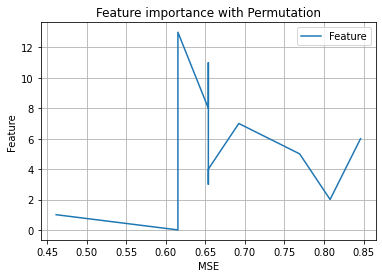

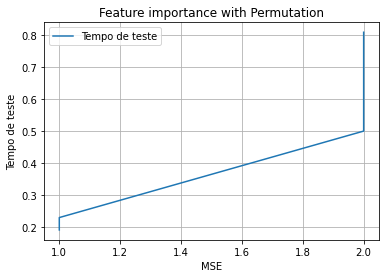

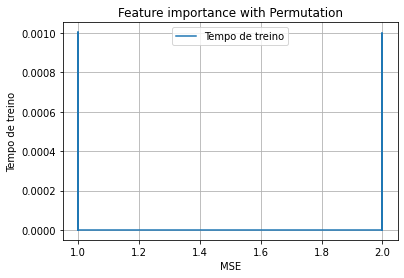

In [10]:
# Feature importance with Permutation:

modelosSuffle = []
mseSuffle = []

for i in range(len(Xlabels)):
    Xs_train = X_train.copy()

    #Suflling the collumn:
    np.random.shuffle(Xs_train[:, i].T)

    clfs = KNN(kn=kn, r=r)

    tempoTreino = time.time()
    clfs.fit(Xs_train, Y_train, Xlabels)
    tempoTreino = time.time() - tempoTreino

    tempoTeste = time.time()
    preds, ps = clfs.predict(X_test)
    tempoTeste = time.time() - tempoTeste

    mse = clfs.MSE(preds, Y_test)

    modelosSuffle.append([clfs, i, mse, tempoTeste, tempoTreino])
    mseSuffle.append(mse)

for i in range(len(mseSuffle)):
    for j in range(i + 1, len(mseSuffle)):
        if mseSuffle[i] > mseSuffle[j]:
            modelosSuffle[i], modelosSuffle[j] = modelosSuffle[j], modelosSuffle[i]
            mseSuffle[i], mseSuffle[j] = mseSuffle[j], mseSuffle[i]

modelosSuffle = np.array(modelosSuffle)

plt.figure()
plt.title('Feature importance with Permutation')
plt.plot(modelosSuffle[:, 2], modelosSuffle[:, 1], label="Feature")
plt.ylabel("Feature")
plt.xlabel("MSE")
plt.legend()
plt.grid()

plt.figure()
plt.title('Feature importance with Permutation')
plt.plot(modelosParamns[:, 2], modelosParamns[:, 3], label="Tempo de teste")
plt.ylabel("Tempo de teste")
plt.xlabel("MSE")
plt.legend()
plt.grid()

plt.figure()
plt.title('Feature importance with Permutation')
plt.plot(modelosParamns[:, 2], modelosParamns[:, 4], label="Tempo de treino")
plt.ylabel("Tempo de treino")
plt.legend()
plt.grid()
plt.xlabel("MSE")

ZeroDivisionError: division by zero

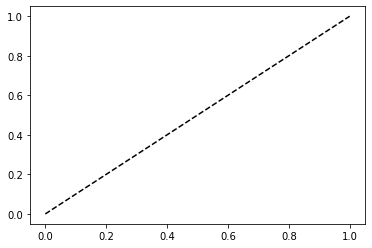

In [11]:
# Get ROC curve analyses:

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='dashed', color="k")

for i in clf.getTargetLabel():
    fpr, tpr, A = clf.ROC(X_test, Y_test, i)
    plt.plot(fpr, tpr, label=f'ROC Curve Class {i} (area = {A})')
    plt.legend()
    plt.grid()

plt.ylabel("True Positeve Rate")
plt.xlabel("False Positive Rate")
plt.title(f'Receiver Operating Characteristic')
plt.show()